### 1. Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?

In [40]:
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error

import numpy as np

In [4]:
df = pd.read_csv("../data/USA_Housing.csv")
df.head(2)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...

In [24]:
# Independent variable
X = df.drop(["Price", "Address"], axis = 1)

# Dependent variable
y = df["Price"]

# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

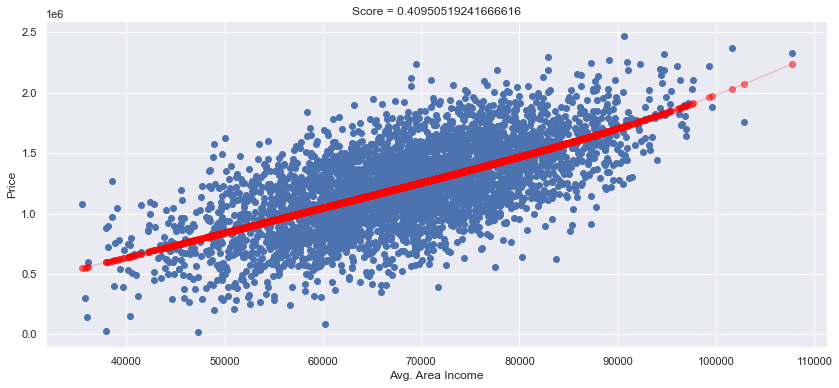

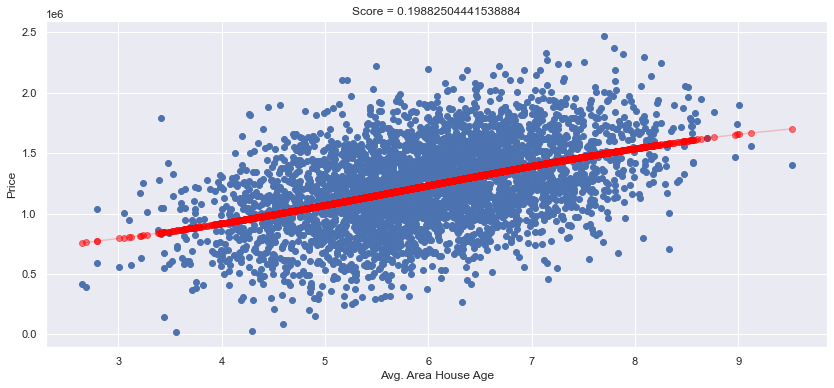

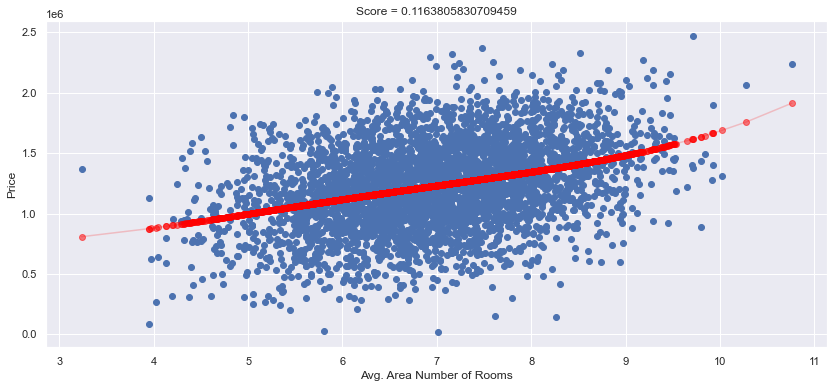

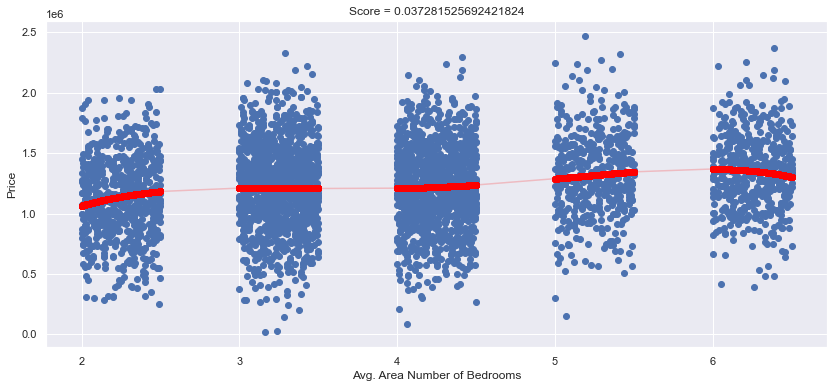

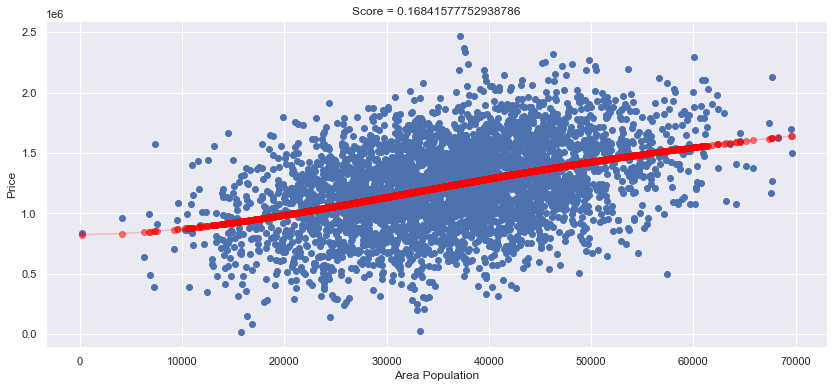

In [55]:
for column in X.columns:
    x_ = np.array(X_train[column]).reshape(-1, 1)

    # Transformation
    pol_model = PolynomialFeatures(4)
    x_poly = pol_model.fit_transform(x_, y_train)

    # Training
    lin_model = LinearRegression()
    lin_model.fit(x_poly, y_train)

    # Prediction
    y_pred = lin_model.predict(x_poly)
    
    # Score
    score = r2_score(y_train, y_pred)

    # Sorting the data to plot
    x_train_to_show, y_train_to_show, y_pred_to_show = zip(*sorted(zip(X_train[column], y_train, y_pred)))

    # Plot
    plt.figure(figsize = (14, 6))

    plt.scatter(x_train_to_show, y_train_to_show, color = "b")

    plt.scatter(x_train_to_show, y_pred_to_show, color = "red", alpha = .5)
    plt.plot(x_train_to_show, y_pred_to_show, color = "red", alpha = .2)

    plt.title(f"Score = {score}")

    plt.ylabel("Price")
    plt.xlabel(column)
    plt.show()

### Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?

In [35]:
columns = X.columns
degrees = range(2, 11)

scores = {}
maes = {}

for column in columns:
    column_scores = []
    column_maes = []

    for degree in degrees:
        x_ = np.array(X_train[column]).reshape(-1, 1)

        # Transformation
        pol_model = PolynomialFeatures(degree)
        x_poly = pol_model.fit_transform(x_, y_train)

        # Training
        lin_model = LinearRegression()
        lin_model.fit(x_poly, y_train)

        # Prediction
        y_pred = lin_model.predict(x_poly)
        
        # Score
        score = r2_score(y_train, y_pred)
        mae = mean_absolute_error(y_train, y_pred)

        column_scores.append(score)
        column_maes.append(mae)

        print(f"\nModel using column '{column}' and degrees = {degree}")
        print(f"score = {score}\nmse = {mae}\n")
        print("#" * 50)

    scores[column] = column_scores
    maes[column] = column_maes


Model using column 'Avg. Area Income' and degrees = 2
score = 0.4093040337337255
mse = 215086.064594395

##################################################

Model using column 'Avg. Area Income' and degrees = 3
score = 0.4093600178926442
mse = 215095.7394341856

##################################################

Model using column 'Avg. Area Income' and degrees = 4
score = 0.40950519241666616
mse = 215057.27649952573

##################################################

Model using column 'Avg. Area Income' and degrees = 5
score = 0.4097120055479522
mse = 214973.22783682193

##################################################

Model using column 'Avg. Area Income' and degrees = 6
score = 0.40972144432847246
mse = 214961.8939638937

##################################################

Model using column 'Avg. Area Income' and degrees = 7
score = 0.40907786598606244
mse = 215051.3526475043

##################################################

Model using column 'Avg. Area Income' and degre

In [39]:
scores_df = pd.DataFrame(scores, index = degrees)
maes_df = pd.DataFrame(maes, index = degrees)

In [42]:
scores_df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
2          0.409304             0.198630                   0.116033   
3          0.409360             0.198825                   0.116302   
4          0.409505             0.198825                   0.116381   
5          0.409712             0.199013                   0.116384   
6          0.409721             0.199758                   0.117165   

   Avg. Area Number of Bedrooms  Area Population  
2                      0.032707         0.168210  
3                      0.032942         0.168449  
4                      0.037282         0.168416  
5                      0.037691         0.167887  
6                      0.039189         0.166329

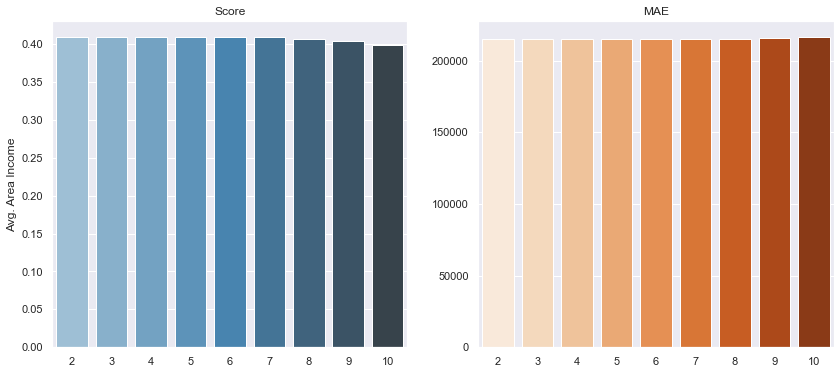

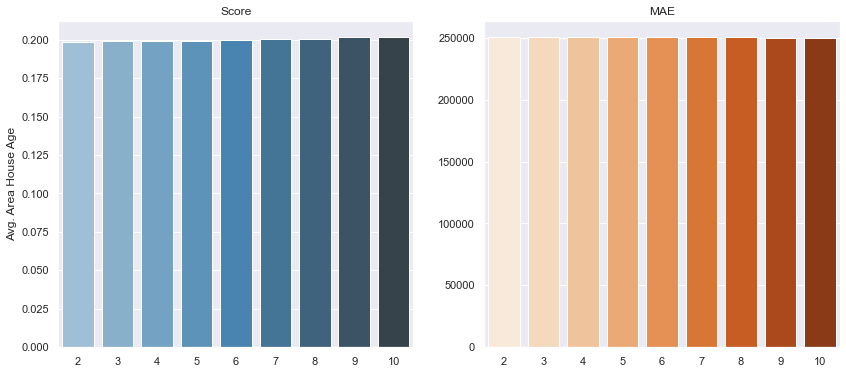

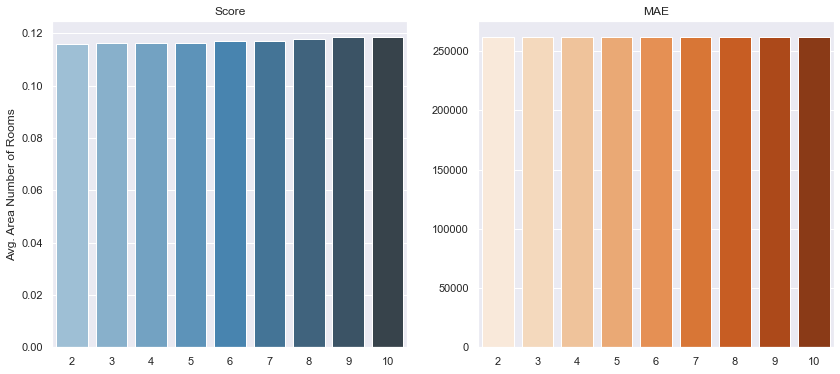

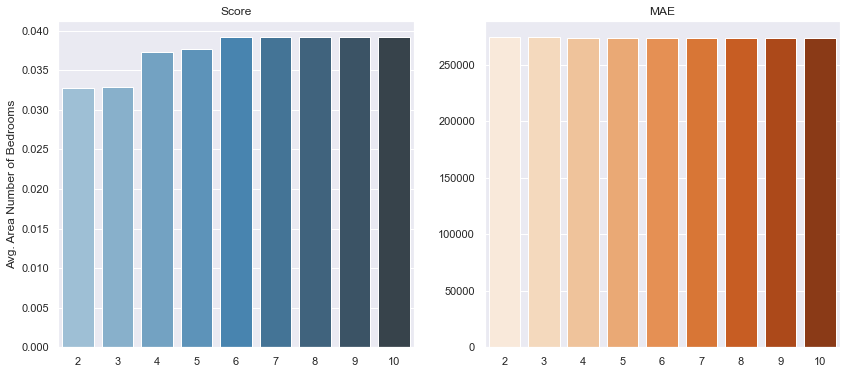

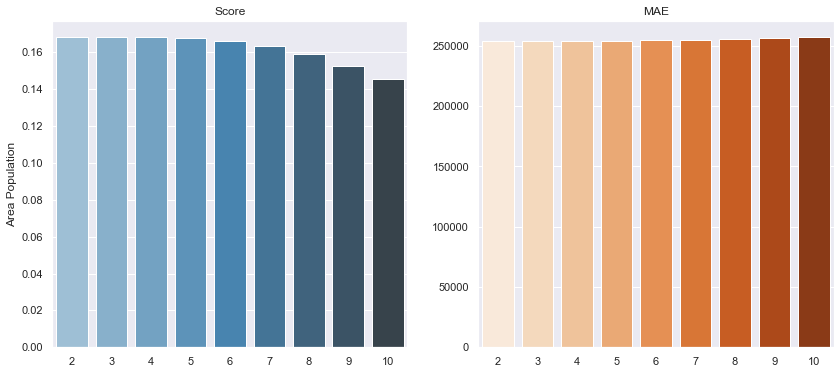

In [50]:
sns.set_theme()

for column in scores_df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
    sns.barplot(x = scores_df.index, y = scores_df[column], palette = "Blues_d", ax = ax1)
    sns.barplot(x = maes_df.index, y = maes_df[column], palette = "Oranges", ax = ax2)

    ax1.set_title("Score")
    ax2.set_title("MAE")

    ax2.set_ylabel("")

    plt.show()

Podemos ver en ambos ejercicios, que para este caso, comparando las variables independientes 1 a 1 con la dependiente, aumentar los grados de la regresión no nos genera mejores resultados en general (exceptuando "Avg. Area Number of Rooms" y "Avg. Area Number of Bedrooms")

In [76]:
# Let's try including all the variables

degrees = range(2, 11)

scores = []
maes =[]


for degree in degrees:
    # Transformation
    full_model = PolynomialFeatures(degree)
    x_poly = full_model.fit_transform(X_train, y_train)

    # Training
    lin_model = LinearRegression()
    lin_model.fit(x_poly, y_train)

    # Prediction
    y_pred = lin_model.predict(x_poly)
    
    # Score
    score = r2_score(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)

    scores.append(score)
    maes.append(mae)

    print(f"\nModel using degrees = {degree}")
    print(f"score = {score}\nmse = {mae}\n")
    print("#" * 50)


Model using degrees = 2
score = 0.9178441945207996
mse = 80655.29803938275

##################################################

Model using degrees = 3
score = 0.9181762958252889
mse = 80651.77618251382

##################################################

Model using degrees = 4
score = 0.9185771663593341
mse = 80569.15162029714

##################################################

Model using degrees = 5
score = 0.9175790363329634
mse = 80743.24820731723

##################################################

Model using degrees = 6
score = 0.8620285467207724
mse = 97187.20610788709

##################################################

Model using degrees = 7
score = 0.8716234289321753
mse = 95206.85582861927

##################################################

Model using degrees = 8
score = 0.8194490442007122
mse = 110021.15185859292

##################################################

Model using degrees = 9
score = 0.8515309764682839
mse = 102505.78353305218

#########################

Text(0.5, 1.0, 'MAE')

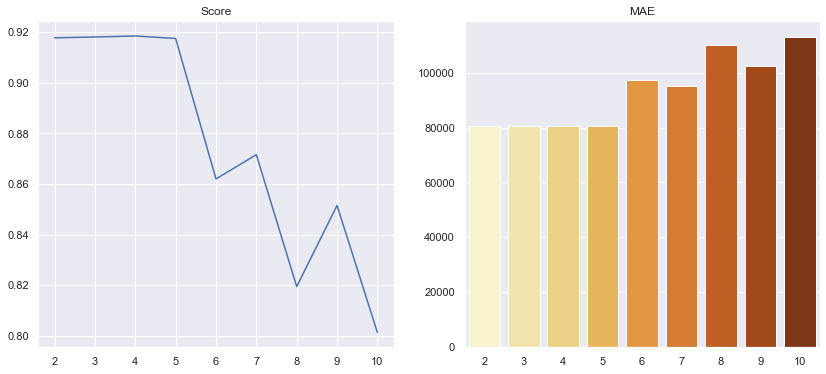

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

sns.lineplot(x = np.array(degrees), y = np.array(scores), ax = ax1)
sns.barplot(x = np.array(degrees), y = np.array(maes), palette = "YlOrBr", ax = ax2)

ax1.set_title("Score")
ax2.set_title("MAE")

Vemos que aumentar los grados de la función cuando tenemos todas las variables nos mejora levemente tanto el score como el mae en las primeras iteraciones, pero a partir de 4 grados, los resultados empiezan a peorar y a partir de 5 este empeoramiento es drástico.